In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from device import Device
from loraextensor import LoRaExtensor

# Set device consumption characteristics
# https://www.semtech.com/products/wireless-rf/lora-connect/sx1262
sx1262 = Device()
sx1262.SetTxCurrent(118.0)          # 868~915 MHz/+22dBm
sx1262.SetRxCurrent(5.3)            # DCDC Mode/Rx Boosted, LoRa, 125Hz
sx1262.SetIdleCurrent(0.6)          # RC mode/XOSC off
sx1262.SetSleepCurrent(0.0012)      # Sleep with warm start/RC64k
sx1262.SetVoltage(3.3)

generateImages = 0

In [ ]:
sf = 10
bw = 125
cr = 1
dataLength = 10
simDurationH = 24*365*10
simDuration = simDurationH * 60*60
endpoint = LoRaExtensor(dataLength, sf, bw, cr)
print("loRa Extensor - endpoint uplink simulation - Device Consumption x Application Uplink Periodicity")
print("LoRa PHY: SF", endpoint.GetSF(), "| BW", endpoint.GetBW(), "kHz | CR", endpoint.GetCR())
print("Simulation Duration [y]:", simDurationH/(24*365), " | Data Length = ", endpoint.GetPacketSize(), " bytes")

periodicityS = 86400
periodicityS_array = np.linspace(1, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []

txCurr_array = []
rxCurr_array = []
sleepCurr_array = []
totalMeanCon_array = []

for periodicityS in periodicityS_array:

    periodicityMin_array.append(periodicityS/60)
    periodicityH_array.append(periodicityS/3600)

    txTime, rxTime, idleTime, sleepTime = endpoint.SimulateEndpointLoRaExtensor(periodicityS, dataLength, simDuration)   
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(totalTime, txTime, rxTime, idleTime, sleepTime)
    txCurr_array.append((tx_mAh/total_mAh)*100)
    rxCurr_array.append((rx_mAh/total_mAh)*100)
    sleepCurr_array.append((sleep_mAh/total_mAh)*100)
    totalMeanCon_array.append((total_mAh/(totalTime/3600))*1000)

LoRaWAN Relay - endpoint uplink simulation - Device Consumption x Application Uplink Periodicity
LoRa PHY: SF 10 | BW 125 kHz | CR 1
Simulation Duration [y]: 10.0  | Data Length =  10  bytes


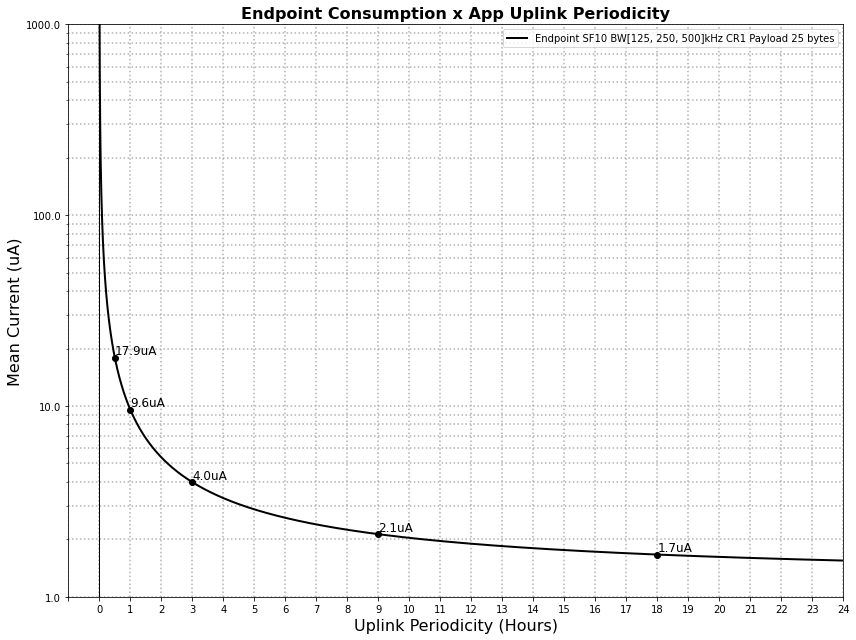

In [22]:
eixo_x = periodicityH_array
eixo_y = totalMeanCon_array

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y, color='black', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes')
ax.set_title('Endpoint Consumption x App Uplink Periodicity', fontsize=16, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('Mean Current (uA)', fontsize=16)
ax.set_yscale('log')
ax.set_ylim(1, 1000)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    y_m = np.interp(x_m, eixo_x, eixo_y)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, y_m, marker='o', color='black', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}uA', fontsize=12, ha='left', va='bottom', color='black')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
if generateImages == 1:
    plt.savefig('loraextensor_ep_meanCurrXappPer.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

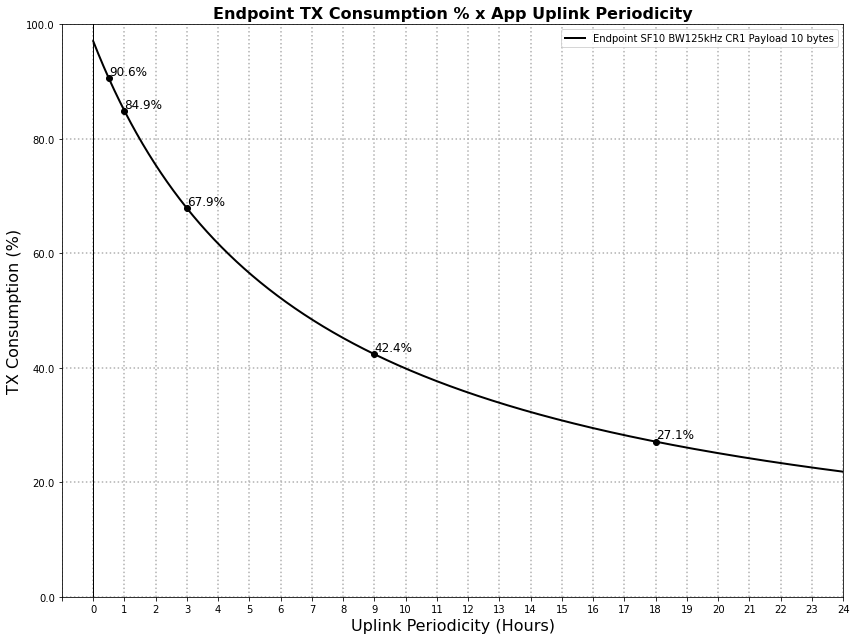

In [4]:
eixo_x = periodicityH_array
eixo_y = txCurr_array

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y, color='black', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes')
ax.set_title('Endpoint TX Consumption % x App Uplink Periodicity', fontsize=16, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('TX Consumption (%)', fontsize=16)
ax.set_ylim(0, 100)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))


x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    y_m = np.interp(x_m, eixo_x, eixo_y)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, y_m, marker='o', color='black', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
if generateImages == 1:
    plt.savefig('loraextensor_ep_txXappPer.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

NameError: name 'generateImages' is not defined

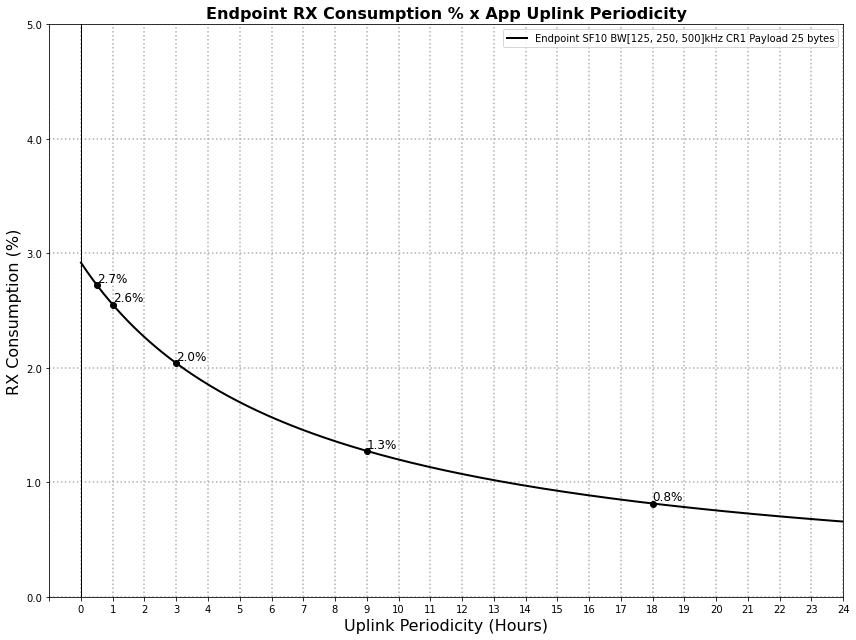

In [23]:
eixo_x = periodicityH_array
eixo_y = rxCurr_array

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y, color='black', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes')
ax.set_title('Endpoint RX Consumption % x App Uplink Periodicity', fontsize=16, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('RX Consumption (%)', fontsize=16)
ax.set_ylim(0, 5)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    y_m = np.interp(x_m, eixo_x, eixo_y)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, y_m, marker='o', color='black', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
if generateImages == 1:
    plt.savefig('loraextensor_ep_rxXappPer.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

NameError: name 'generateImages' is not defined

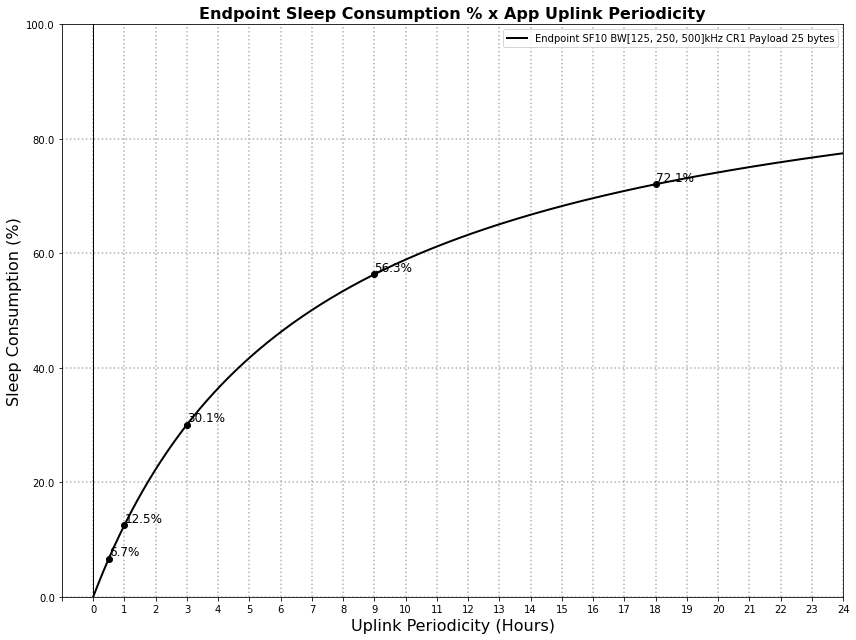

In [24]:
eixo_x = periodicityH_array
eixo_y = sleepCurr_array

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y, color='black', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw}kHz CR{cr} Payload {dataLength} bytes')
ax.set_title('Endpoint Sleep Consumption % x App Uplink Periodicity', fontsize=16, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('Sleep Consumption (%)', fontsize=16)
ax.set_ylim(0, 100)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    y_m = np.interp(x_m, eixo_x, eixo_y)  # estima o y naquele x
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax.plot(x_m, y_m, marker='o', color='black', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')

ax.grid(True, which='both', linestyle=':', linewidth=1.5)
plt.legend()
plt.tight_layout()
if generateImages == 1:
    plt.savefig('lorasleep_ep_sleepXappPer.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

In [ ]:
sf = 7
bw = 125
cr = 1
simDurationH = 24*365*10
simDuration = simDurationH * 60*60
endpoint = LoRaExtensor(8, sf, bw, cr)
print("Lora Extensor - endpoint uplink simulation - Device Consumption x Application Period")
print("LoRa PHY: SF", endpoint.GetSF(), "| BW", endpoint.GetBW(), "kHz | CR", endpoint.GetCR())
print("Simulation duration [y]:", simDurationH/(24*365))

periodicityS = 86400
periodicityS_array = np.linspace(1, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []

txCurr_array10 = []
txCurr_array50 = []

rxCurr_array10 = []
rxCurr_array50 = []

sleepCurr_array10 = []
sleepCurr_array50 = []

totalMeanCon_array10 = []
totalMeanCon_array50 = []

dataLength = [10, 20, 30, 40, 50]
for periodicityS in periodicityS_array:

    periodicityMin_array.append(periodicityS/60)
    periodicityH_array.append(periodicityS/3600)
    
    txTime, rxTime, idleTime, sleepTime = endpoint.SimulateEndpointLoRaExtensor(periodicityS, dataLength[0], simDuration)
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txCurr_array10.append((tx_mAh/total_mAh)*100)
    rxCurr_array10.append((rx_mAh/total_mAh)*100)
    sleepCurr_array10.append((sleep_mAh/total_mAh)*100)
    totalMeanCon_array10.append((total_mAh/(totalTime/3600))*1000)

    txTime, rxTime, idleTime, sleepTime = endpoint.SimulateEndpointLoRaExtensor(periodicityS, dataLength[4], simDuration)
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txCurr_array50.append((tx_mAh/total_mAh)*100)
    rxCurr_array50.append((rx_mAh/total_mAh)*100)
    sleepCurr_array50.append((sleep_mAh/total_mAh)*100)
    totalMeanCon_array50.append((total_mAh/(totalTime/3600))*1000)

LoRaWAN Relay - endpoint uplink simulation - Device Consumption x Application Period
LoRa PHY: SF 7 | BW 125 kHz | CR 1
Simulation duration [y]: 10.0


NameError: name 'generateImages' is not defined

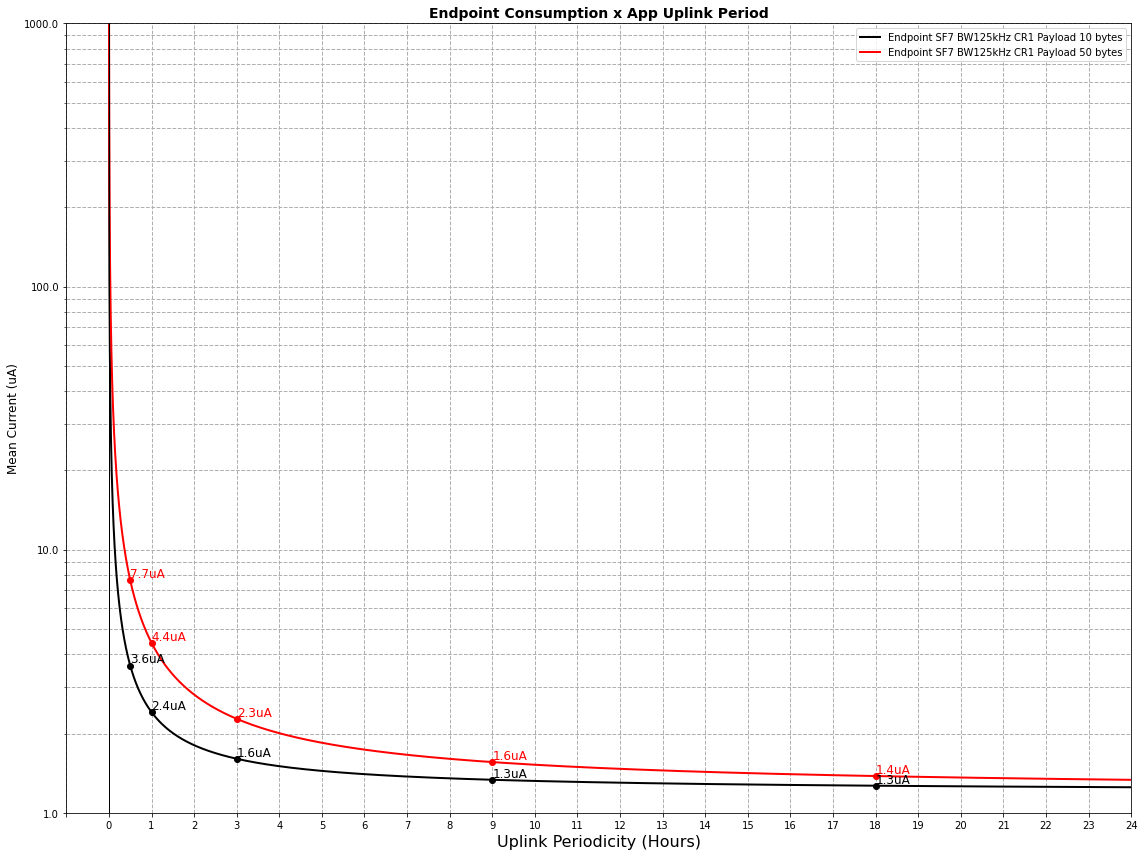

In [26]:
eixo_x = periodicityH_array
eixo_y1 = totalMeanCon_array10
eixo_y5 = totalMeanCon_array50

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw}kHz CR{cr} Payload {dataLength[0]} bytes')
ax.plot(eixo_x, eixo_y5, color='red', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw}kHz CR{cr} Payload {dataLength[4]} bytes')

ax.set_title('Endpoint Consumption x App Uplink Period', fontsize=14, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('Mean Current (uA)', fontsize=12)
ax.set_yscale('log')
ax.set_ylim(1, 1000)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='black', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}uA', fontsize=12, ha='left', va='bottom', color='black')
    y_m = np.interp(x_m, eixo_x, eixo_y5)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='red', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}uA', fontsize=12, ha='left', va='bottom', color='red')

ax.grid(True, which='both', linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()
if generateImages == 1:
    plt.savefig('loraextensor_ep_meanCurXappPer_data.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

NameError: name 'generateImages' is not defined

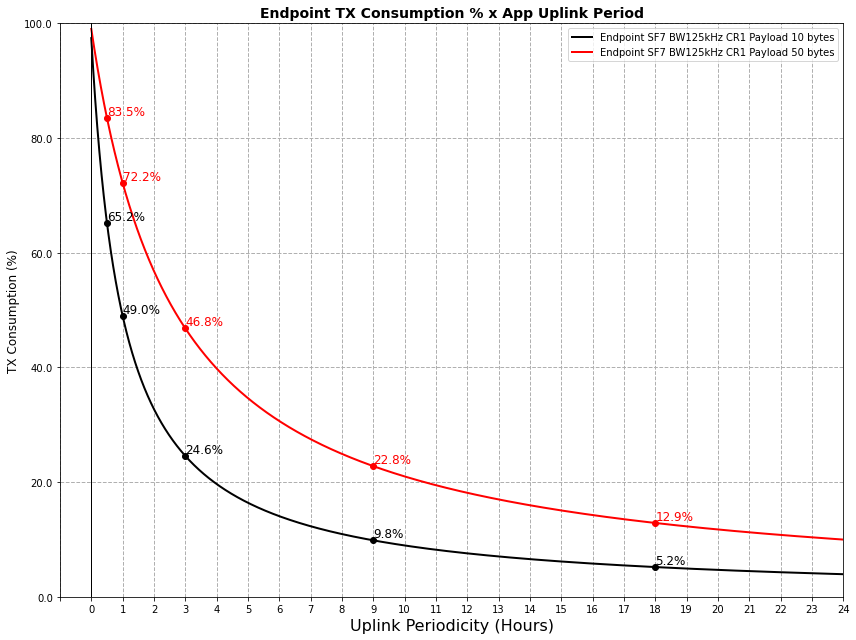

In [27]:
eixo_x = periodicityH_array
eixo_y1 = txCurr_array10
eixo_y5 = txCurr_array50

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw}kHz CR{cr} Payload {dataLength[0]} bytes')
ax.plot(eixo_x, eixo_y5, color='red', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw}kHz CR{cr} Payload {dataLength[4]} bytes')

ax.set_title('Endpoint TX Consumption % x App Uplink Period', fontsize=14, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('TX Consumption (%)', fontsize=12)
ax.set_ylim(0, 100)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='black', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    y_m = np.interp(x_m, eixo_x, eixo_y5)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='red', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='red')

ax.grid(True, which='both', linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()
if generateImages == 1:
    plt.savefig('loraextensor_ep_txXappPer_data.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

NameError: name 'generateImages' is not defined

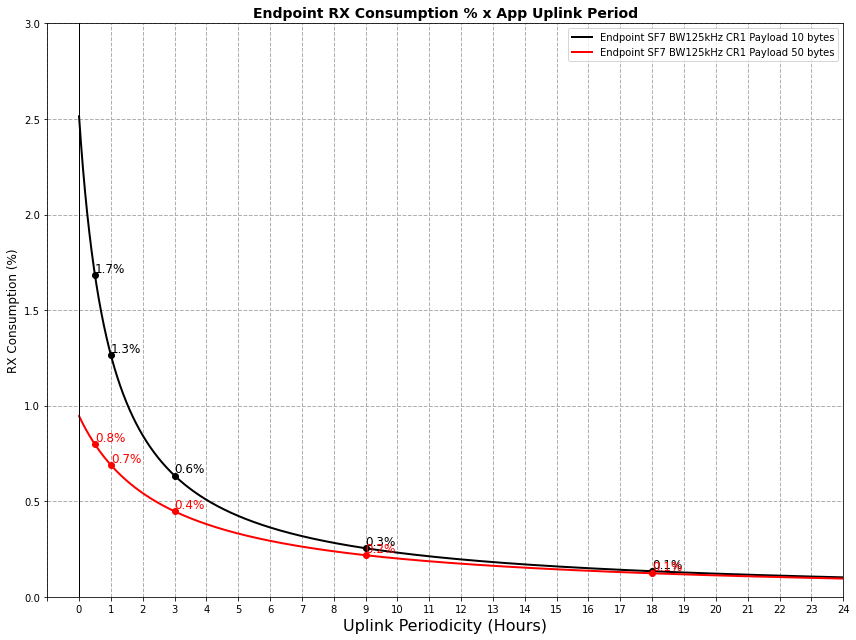

In [28]:
eixo_x = periodicityH_array
eixo_y1 = rxCurr_array10
eixo_y5 = rxCurr_array50

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw}kHz CR{cr} Payload {dataLength[0]} bytes')
ax.plot(eixo_x, eixo_y5, color='red', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw}kHz CR{cr} Payload {dataLength[4]} bytes')

ax.set_title('Endpoint RX Consumption % x App Uplink Period', fontsize=14, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('RX Consumption (%)', fontsize=12)
ax.set_ylim(0, 3)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y1_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    y5_m = np.interp(x_m, eixo_x, eixo_y5)  # estima o y naquele x
    ax.plot(x_m, y1_m, marker='o', color='black', markersize=6)
    ax.text(x_m, y1_m, f'{y1_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    ax.plot(x_m, y5_m, marker='o', color='red', markersize=6)
    ax.text(x_m, y5_m, f'{y5_m:.1f}%', fontsize=12, ha='left', va='bottom', color='red')

ax.grid(True, which='both', linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()
if generateImages == 1:
    plt.savefig('loraextensor_ep_rxXappPer_data.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

NameError: name 'generateImages' is not defined

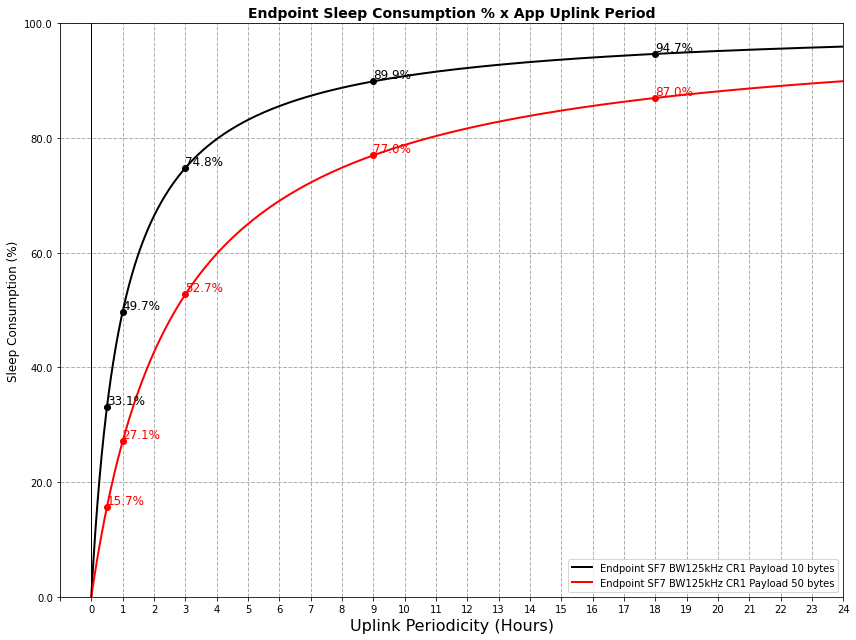

In [29]:
eixo_x = periodicityH_array
eixo_y1 = sleepCurr_array10
eixo_y5 = sleepCurr_array50

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw}kHz CR{cr} Payload {dataLength[0]} bytes')
ax.plot(eixo_x, eixo_y5, color='red', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw}kHz CR{cr} Payload {dataLength[4]} bytes')

ax.set_title('Endpoint Sleep Consumption % x App Uplink Period', fontsize=14, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('Sleep Consumption (%)', fontsize=12)
ax.set_ylim(0, 100)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='black', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    y_m = np.interp(x_m, eixo_x, eixo_y5)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='red', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='red')

ax.grid(True, which='both', linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()
if generateImages == 1:
    plt.savefig('loraextensor_ep_sleepXappPer_data.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

In [30]:
sf = [7, 10, 12]
bw = 125
cr = 1
dataLength = 25
simDurationH = 24*365*10
simDuration = simDurationH * 60*60

periodicityS = 86400
periodicityS_array = np.linspace(1, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []

txCurr_array7 = []
txCurr_array10 = []
txCurr_array12 = []

rxCurr_array7 = []
rxCurr_array10 = []
rxCurr_array12 = []

sleepCurr_array7 = []
sleepCurr_array10 = []
sleepCurr_array12 = []

totalMeanCon_array7 = []
totalMeanCon_array10 = []
totalMeanCon_array12 = []

for periodicityS in periodicityS_array:

    periodicityMin_array.append(periodicityS/60)
    periodicityH_array.append(periodicityS/3600)
    
    endpoint = LoRaExtensor(8, sf[0], bw, cr)
    txTime, rxTime, idleTime, sleepTime = endpoint.SimulateEndpointLoRaExtensor(periodicityS, dataLength, simDuration)
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txCurr_array7.append((tx_mAh/total_mAh)*100)
    rxCurr_array7.append((rx_mAh/total_mAh)*100)
    sleepCurr_array7.append((sleep_mAh/total_mAh)*100)
    totalMeanCon_array7.append((total_mAh/(totalTime/3600))*1000)

    endpoint = LoRaExtensor(8, sf[1], bw, cr)
    txTime, rxTime, idleTime, sleepTime = endpoint.SimulateEndpointLoRaExtensor(periodicityS, dataLength, simDuration)
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txCurr_array10.append((tx_mAh/total_mAh)*100)
    rxCurr_array10.append((rx_mAh/total_mAh)*100)
    sleepCurr_array10.append((sleep_mAh/total_mAh)*100)
    totalMeanCon_array10.append((total_mAh/(totalTime/3600))*1000)

    endpoint = LoRaExtensor(8, sf[2], bw, cr)
    txTime, rxTime, idleTime, sleepTime = endpoint.SimulateEndpointLoRaExtensor(periodicityS, dataLength, simDuration)
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txCurr_array12.append((tx_mAh/total_mAh)*100)
    rxCurr_array12.append((rx_mAh/total_mAh)*100)
    sleepCurr_array12.append((sleep_mAh/total_mAh)*100)
    totalMeanCon_array12.append((total_mAh/(totalTime/3600))*1000)

NameError: name 'generateImages' is not defined

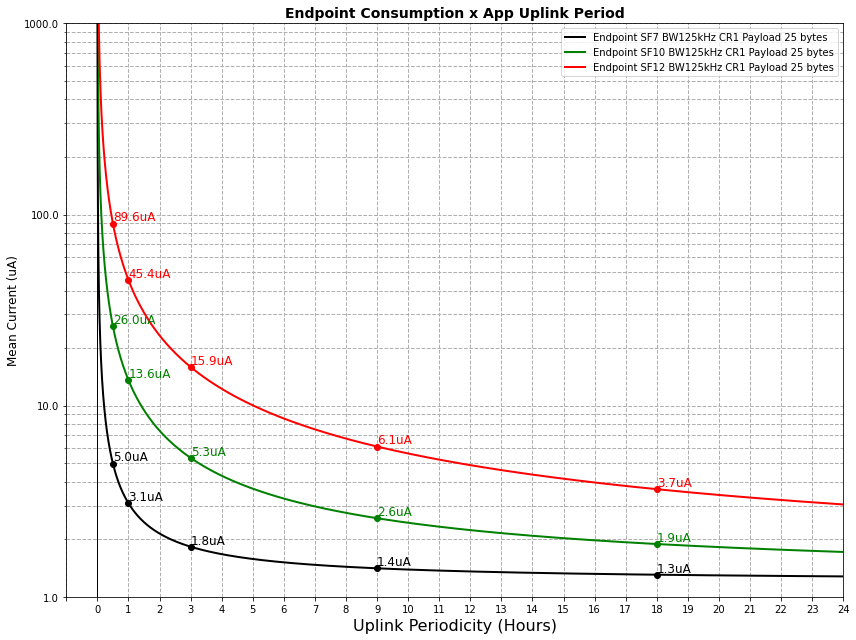

In [33]:
eixo_x = periodicityH_array
eixo_y1 = totalMeanCon_array7
eixo_y2 = totalMeanCon_array10
eixo_y3 = totalMeanCon_array12

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Endpoint SF{sf[0]} BW{bw}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y2, color='green', linewidth=2, \
        label=f'Endpoint SF{sf[1]} BW{bw}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y3, color='red', linewidth=2, \
        label=f'Endpoint SF{sf[2]} BW{bw}kHz CR{cr} Payload {dataLength} bytes')

ax.set_title('Endpoint Consumption x App Uplink Period', fontsize=14, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('Mean Current (uA)', fontsize=12)
ax.set_yscale('log')
ax.set_ylim(1, 1000)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='black', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}uA', fontsize=12, ha='left', va='bottom', color='black')
    y_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='green', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}uA', fontsize=12, ha='left', va='bottom', color='green')
    y_m = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='red', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}uA', fontsize=12, ha='left', va='bottom', color='red')

ax.grid(True, which='both', linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()
if generateImages == 1:
    plt.savefig('loraextensor_ep_meanCurXappPer_sf.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

NameError: name 'generateImages' is not defined

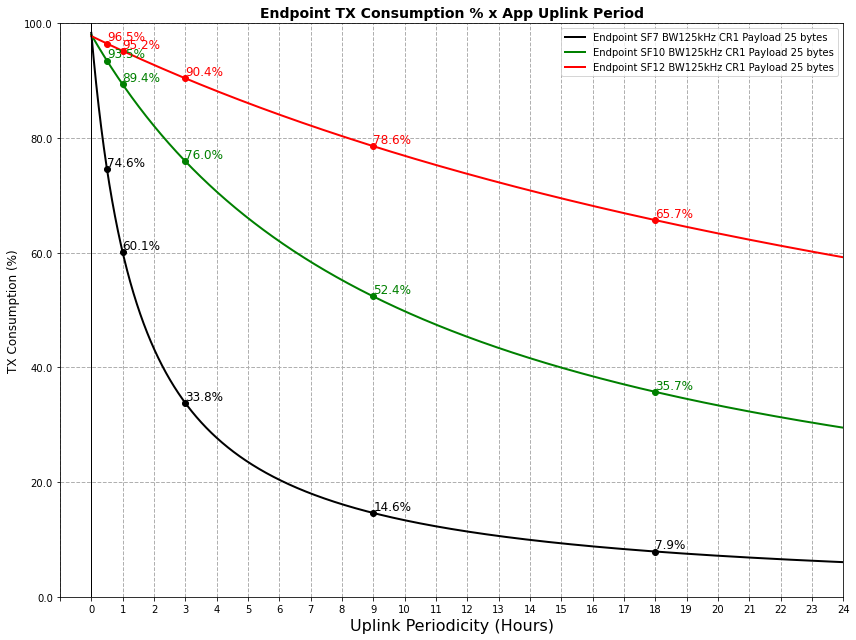

In [34]:
eixo_x = periodicityH_array
eixo_y1 = txCurr_array7
eixo_y2 = txCurr_array10
eixo_y3 = txCurr_array12

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Endpoint SF{sf[0]} BW{bw}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y2, color='green', linewidth=2, \
        label=f'Endpoint SF{sf[1]} BW{bw}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y3, color='red', linewidth=2, \
        label=f'Endpoint SF{sf[2]} BW{bw}kHz CR{cr} Payload {dataLength} bytes')

ax.set_title('Endpoint TX Consumption % x App Uplink Period', fontsize=14, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('TX Consumption (%)', fontsize=12)
ax.set_ylim(0, 100)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='black', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    y_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='green', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='green')
    y_m = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='red', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='red')

ax.grid(True, which='both', linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()
if generateImages == 1:
    plt.savefig('loraextensor_ep_txXappPer_sf.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

NameError: name 'generateImages' is not defined

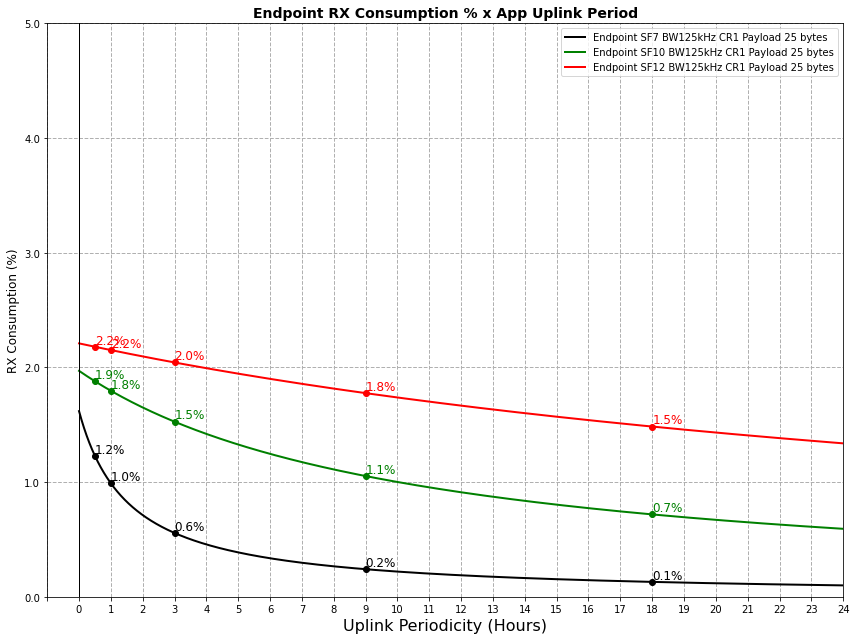

In [35]:
eixo_x = periodicityH_array
eixo_y1 = rxCurr_array7
eixo_y2 = rxCurr_array10
eixo_y3 = rxCurr_array12

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Endpoint SF{sf[0]} BW{bw}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y2, color='green', linewidth=2, \
        label=f'Endpoint SF{sf[1]} BW{bw}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y3, color='red', linewidth=2, \
        label=f'Endpoint SF{sf[2]} BW{bw}kHz CR{cr} Payload {dataLength} bytes')

ax.set_title('Endpoint RX Consumption % x App Uplink Period', fontsize=14, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('RX Consumption (%)', fontsize=12)
ax.set_ylim(0, 5)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='black', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    y_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='green', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='green')
    y_m = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='red', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='red')

ax.grid(True, which='both', linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()
if generateImages == 1:
    plt.savefig('loraextensor_ep_rxXappPer_sf.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

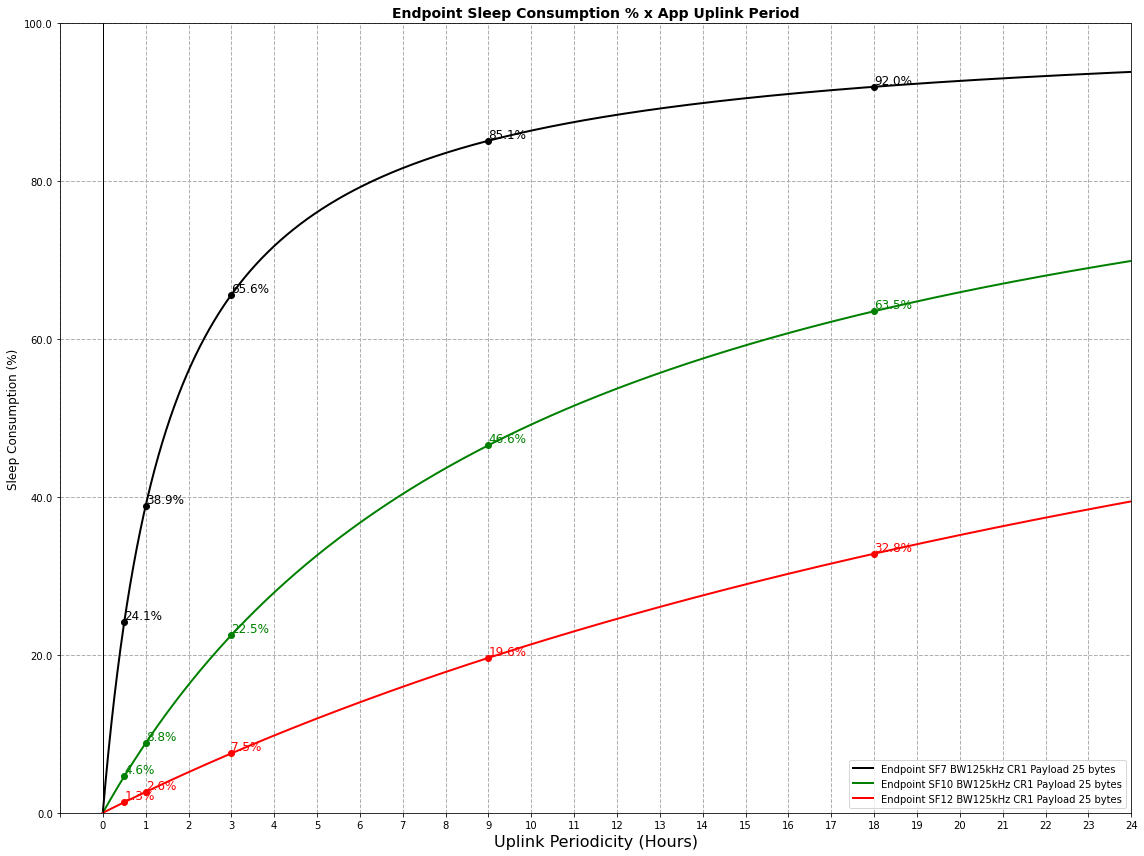

In [ ]:
eixo_x = periodicityH_array
eixo_y1 = sleepCurr_array7
eixo_y2 = sleepCurr_array10
eixo_y3 = sleepCurr_array12

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Endpoint SF{sf[0]} BW{bw}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y2, color='green', linewidth=2, \
        label=f'Endpoint SF{sf[1]} BW{bw}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y3, color='red', linewidth=2, \
        label=f'Endpoint SF{sf[2]} BW{bw}kHz CR{cr} Payload {dataLength} bytes')

ax.set_title('Endpoint Sleep Consumption % x App Uplink Period', fontsize=14, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('Sleep Consumption (%)', fontsize=12)
ax.set_ylim(0, 100)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='black', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    y_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='green', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='green')
    y_m = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='red', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='red')

ax.grid(True, which='both', linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()
if generateImages == 1:
    plt.savefig('loraextensor_ep_sleepXappPer_sf.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

In [36]:
sf = 10
bw = [125, 250, 500]
cr = 1
dataLength = 25
simDurationH = 24*365*10
simDuration = simDurationH * 60*60

periodicityS = 86400
periodicityS_array = np.linspace(1, periodicityS, periodicityS-1)
periodicityMin_array = []
periodicityH_array = []

txCurr_array125 = []
txCurr_array250 = []
txCurr_array500 = []

rxCurr_array125 = []
rxCurr_array250 = []
rxCurr_array500 = []

sleepCurr_array125 = []
sleepCurr_array250 = []
sleepCurr_array500 = []

totalMeanCon_array125 = []
totalMeanCon_array250 = []
totalMeanCon_array500 = []

for periodicityS in periodicityS_array:
    periodicityMin_array.append(periodicityS/60)
    periodicityH_array.append(periodicityS/3600)
    
    endpoint = LoRaExtensor(8, sf, bw[0], cr)
    txTime, rxTime, idleTime, sleepTime = endpoint.SimulateEndpointLoRaExtensor(periodicityS, dataLength, simDuration)
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txCurr_array125.append((tx_mAh/total_mAh)*100)
    rxCurr_array125.append((rx_mAh/total_mAh)*100)
    sleepCurr_array125.append((sleep_mAh/total_mAh)*100)
    totalMeanCon_array125.append((total_mAh/(totalTime/3600))*1000)

    endpoint = LoRaExtensor(8, sf, bw[1], cr)
    txTime, rxTime, idleTime, sleepTime = endpoint.SimulateEndpointLoRaExtensor(periodicityS, dataLength, simDuration)
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txCurr_array250.append((tx_mAh/total_mAh)*100)
    rxCurr_array250.append((rx_mAh/total_mAh)*100)
    sleepCurr_array250.append((sleep_mAh/total_mAh)*100)
    totalMeanCon_array250.append((total_mAh/(totalTime/3600))*1000)

    endpoint = LoRaExtensor(8, sf, bw[2], cr)
    txTime, rxTime, idleTime, sleepTime = endpoint.SimulateEndpointLoRaExtensor(periodicityS, dataLength, simDuration)
    totalTime = txTime + rxTime + idleTime + sleepTime
    total_mAh, tx_mAh, rx_mAh, idle_mAh, sleep_mAh = sx1262.GetAppConsumption(simDurationH, txTime, rxTime, idleTime, sleepTime)
    txCurr_array500.append((tx_mAh/total_mAh)*100)
    rxCurr_array500.append((rx_mAh/total_mAh)*100)
    sleepCurr_array500.append((sleep_mAh/total_mAh)*100)
    totalMeanCon_array500.append((total_mAh/(totalTime/3600))*1000)

NameError: name 'generateImages' is not defined

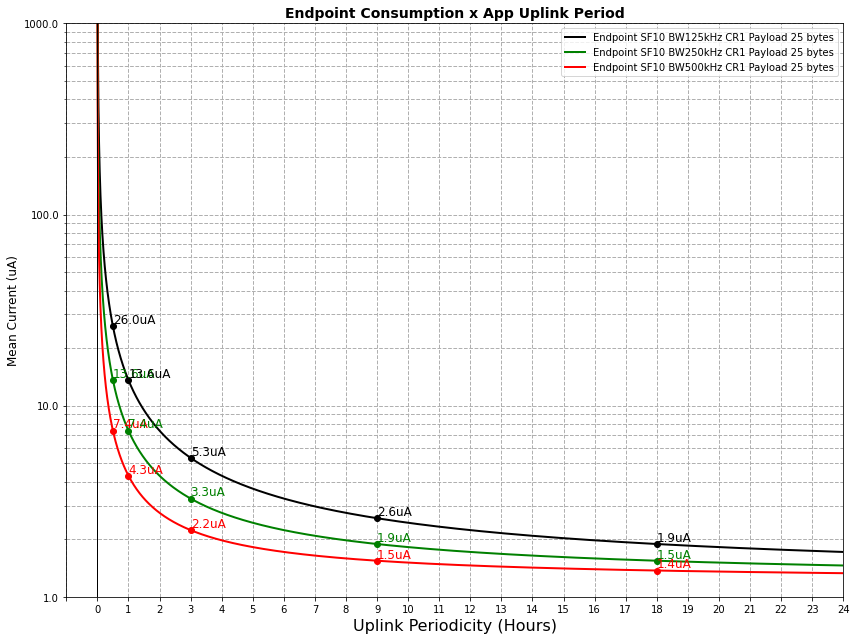

In [37]:
eixo_x = periodicityH_array
eixo_y1 = totalMeanCon_array125
eixo_y2 = totalMeanCon_array250
eixo_y3 = totalMeanCon_array500

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw[0]}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y2, color='green', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw[1]}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y3, color='red', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw[2]}kHz CR{cr} Payload {dataLength} bytes')

ax.set_title('Endpoint Consumption x App Uplink Period', fontsize=14, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('Mean Current (uA)', fontsize=12)
ax.set_yscale('log')
ax.set_ylim(1, 1000)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='black', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}uA', fontsize=12, ha='left', va='bottom', color='black')
    y_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='green', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}uA', fontsize=12, ha='left', va='bottom', color='green')
    y_m = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='red', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}uA', fontsize=12, ha='left', va='bottom', color='red')

ax.grid(True, which='both', linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()
if generateImages == 1:
    plt.savefig('loraextensor_ep_meanCurXappPer_bw.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

NameError: name 'generateImages' is not defined

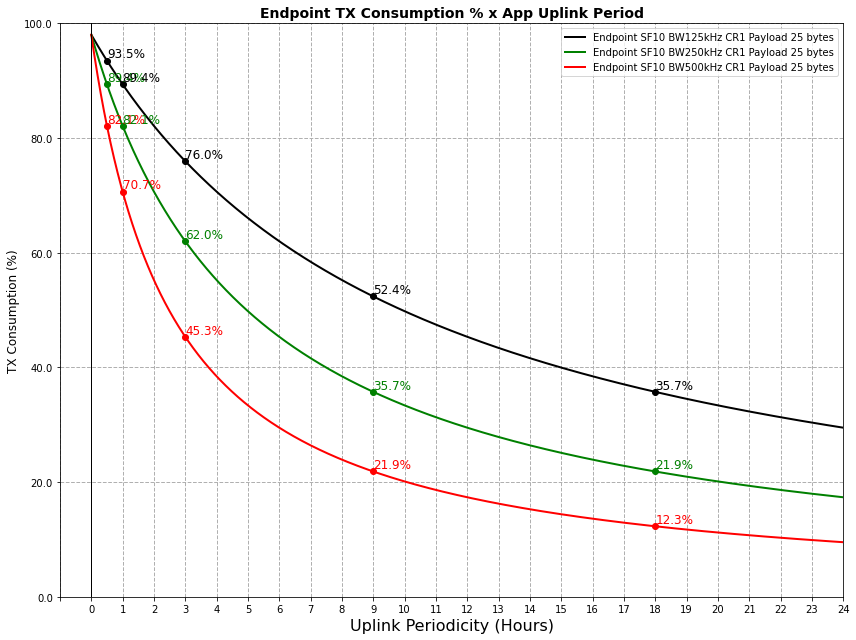

In [38]:
eixo_x = periodicityH_array
eixo_y1 = txCurr_array125
eixo_y2 = txCurr_array250
eixo_y3 = txCurr_array500

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw[0]}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y2, color='green', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw[1]}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y3, color='red', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw[2]}kHz CR{cr} Payload {dataLength} bytes')

ax.set_title('Endpoint TX Consumption % x App Uplink Period', fontsize=14, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('TX Consumption (%)', fontsize=12)
ax.set_ylim(0, 100)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='black', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    y_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='green', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='green')
    y_m = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='red', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='red')

ax.grid(True, which='both', linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()
if generateImages == 1:
    plt.savefig('loraextensor_ep_txXappPer_bw.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

NameError: name 'generateImages' is not defined

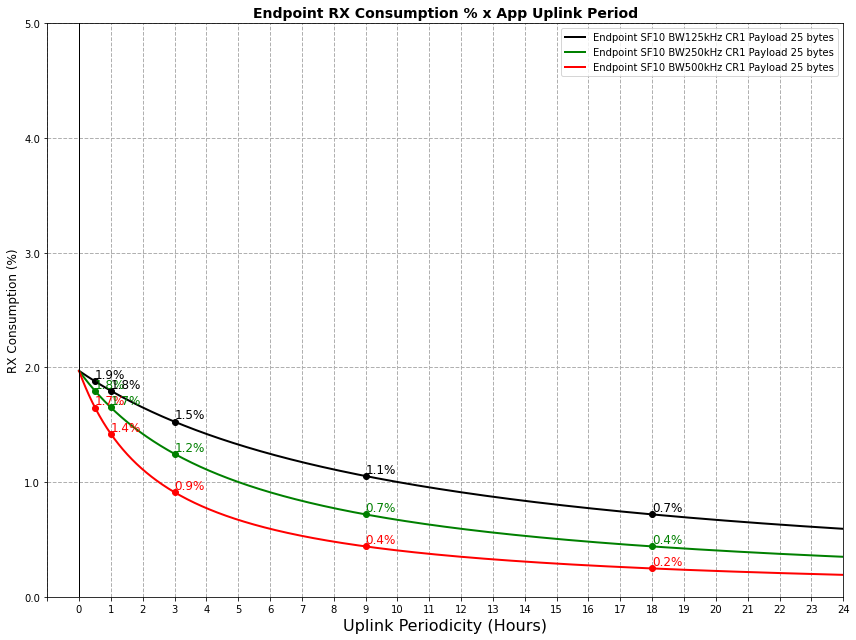

In [40]:
eixo_x = periodicityH_array
eixo_y1 = rxCurr_array125
eixo_y2 = rxCurr_array250
eixo_y3 = rxCurr_array500

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw[0]}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y2, color='green', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw[1]}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y3, color='red', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw[2]}kHz CR{cr} Payload {dataLength} bytes')

ax.set_title('Endpoint RX Consumption % x App Uplink Period', fontsize=14, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('RX Consumption (%)', fontsize=12)
ax.set_ylim(0, 5)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='black', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    y_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='green', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='green')
    y_m = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='red', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='red')

ax.grid(True, which='both', linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()
if generateImages == 1:
    plt.savefig('loraextensor_ep_rxXappPer_bw.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()

NameError: name 'generateImages' is not defined

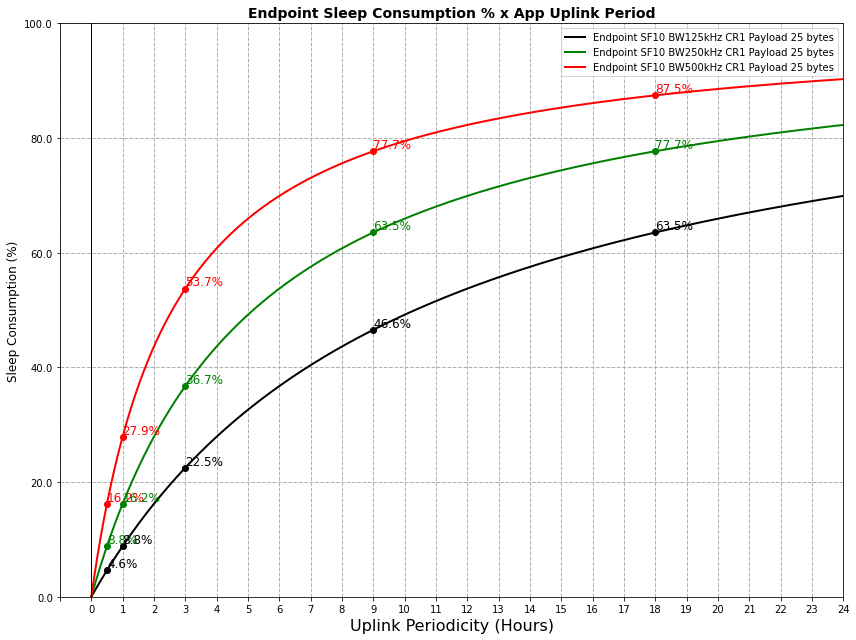

In [41]:
eixo_x = periodicityH_array
eixo_y1 = sleepCurr_array125
eixo_y2 = sleepCurr_array250
eixo_y3 = sleepCurr_array500

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(eixo_x, eixo_y1, color='black', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw[0]}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y2, color='green', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw[1]}kHz CR{cr} Payload {dataLength} bytes')
ax.plot(eixo_x, eixo_y3, color='red', linewidth=2, \
        label=f'Endpoint SF{sf} BW{bw[2]}kHz CR{cr} Payload {dataLength} bytes')

ax.set_title('Endpoint Sleep Consumption % x App Uplink Period', fontsize=14, weight='bold')
ax.set_xlabel('Uplink Periodicity (Hours)', fontsize=16)
ax.set_ylabel('Sleep Consumption (%)', fontsize=12)
ax.set_ylim(0, 100)
ax.set_xlim(-1, 24)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '' if x == -1 else f'{int(x)}'))

x_marcar = [0.5, 1, 3, 9, 18]
for x_m in x_marcar:
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
    y_m = np.interp(x_m, eixo_x, eixo_y1)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='black', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='black')
    y_m = np.interp(x_m, eixo_x, eixo_y2)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='green', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='green')
    y_m = np.interp(x_m, eixo_x, eixo_y3)  # estima o y naquele x
    ax.plot(x_m, y_m, marker='o', color='red', markersize=6)
    ax.text(x_m, y_m, f'{y_m:.1f}%', fontsize=12, ha='left', va='bottom', color='red')

ax.grid(True, which='both', linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()
if generateImages == 1:
    plt.savefig('loraextensor_ep_sleepXappPer_bw.png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()